# 9.

Implementações Computacionais de Redes Neurais.

Para cada um dos problemas abaixo apresente a solução fazendo uso de redes. Apresente na solução a curva do erro de treinamento e o erro de validação:

## 9.1

Defina a estrutura de uma rede perceptron de múltiplas camadas para aproximar a função:

 $f(x) = 16x_1² + x_1x_2 + 8x_2² - x_1 - x_2 + ln(1 + x_1² + x_2²)$


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Função para gerar dados de treinamento
def generate_data(n_samples):
    np.random.seed(0)
    X = np.random.rand(n_samples, 2) * 10 - 5  # Gera valores aleatórios entre -5 e 5
    y = 16 * X[:,0]**2 + X[:,0] * X[:,1] + 8 * X[:,1]**2 - X[:,0] - X[:,1] + np.log(1 + X[:,0]**2 + X[:,1]**2)
    return X, y.reshape(-1, 1)

# Gerando dados de treinamento
X_train, y_train = generate_data(1000)
X_val, y_val = generate_data(200)  # Dados de validação

# Definindo a arquitetura da rede
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo e acompanhando o erro de validação
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
32/32 [==============================] - 3s 12ms/step - loss: 63070.4766 - val_loss: 57198.0039
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 62869.2148 - val_loss: 57004.0547
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 62659.1367 - val_loss: 56805.2031
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 62439.5859 - val_loss: 56593.4648
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 62204.6328 - val_loss: 56360.0664
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 61951.8984 - val_loss: 56117.4414
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 61678.0977 - val_loss: 55849.0312
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 61381.4141 - val_loss: 55552.6992
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 61054.9102 - val_loss: 55236.6289
Epoch 10/100
32/32 [================

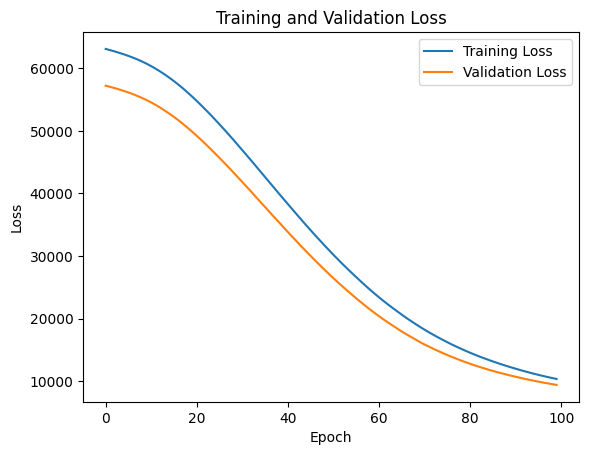

In [2]:
# Plotando a curva do erro de treinamento e erro de validação
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 9.2

Considere o problema das espirais. Sendo a espiral 1 uma classe e a espiral 2 outra classe. Gere as curvas das espirais usando as seguintes equações:

- Espiral 1:

  $x = \frac{\theta}{4}cos(\theta), ~y = \frac{\theta}{4}sen(\theta), ~\theta \geq 0$

- Espiral 2:

  $x = (\frac{\theta}{4} + 0.8)cos(\theta), ~y = (\frac{\theta}{4} + 0.8)sen(\theta), ~\theta \geq 0$

Solucione este problema utilizando uma rede perceptron de múltiplas camadas. Gere a partir das equações os dados para treinamento e teste. Determine a **matriz de confusão**.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.neural_network  import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix
from mlxtend.plotting        import plot_decision_regions

In [4]:
theta = np.linspace(0, 90, 10000)

x0 = [t / 4 * np.cos(t) for t in theta]
y0 = [t / 4 * np.sin(t) for t in theta]

x1 = [(t / 4 + 0.8) * np.cos(t) for t in theta]
y1 = [(t / 4 + 0.8) * np.sin(t) for t in theta]

In [5]:
data0 = pd.DataFrame({
  "x": x0,
  "y": y0,
  "class": [0] * len(x0)
})

data1 = pd.DataFrame({
  "x": x1,
  "y": y1,
  "class": [1] * len(x1)
})

data = pd.concat([data0, data1], ignore_index=True)

data

,x,y,class
0,0.000000,0.000000,0
1,0.002250,0.000020,0
2,0.004500,0.000081,0
3,0.006748,0.000182,0
4,0.008995,0.000324,0
...,...,...,...
19995,-9.679811,21.184237,1
19996,-9.871047,21.098291,1
19997,-10.061520,21.010619,1
19998,-10.251215,20.921227,1


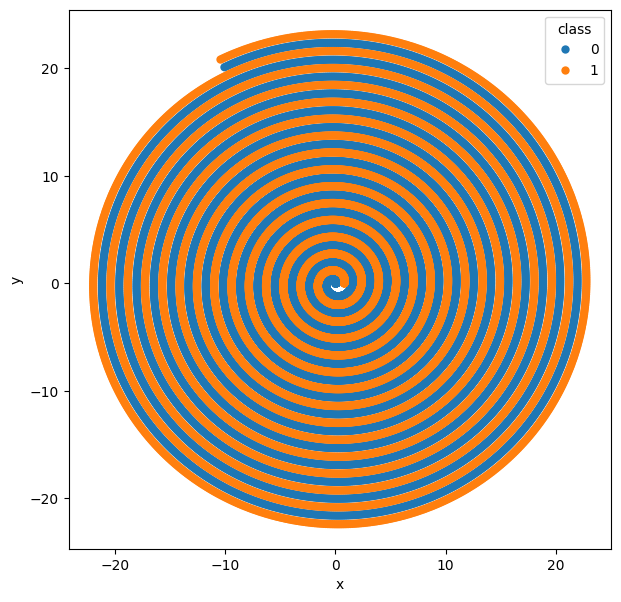

In [6]:
plt.figure(figsize=(7, 7))

sns.scatterplot(data=data, x="x", y="y", hue="class", sizes=1, linewidth=0)

plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data[["x", "y"]], data["class"], test_size=0.2, random_state=42, stratify=data["class"])

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 100, 50),
    activation="relu",
    solver="adam",
    learning_rate="adaptive",
    max_iter=1500,
    random_state=42,
    tol=1e-7
)

# Treinar o classificador
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

# Acurácia do modelo
print(f"Score: {mlp.score(X_test, y_test) * 100}%")

Score: 76.25%


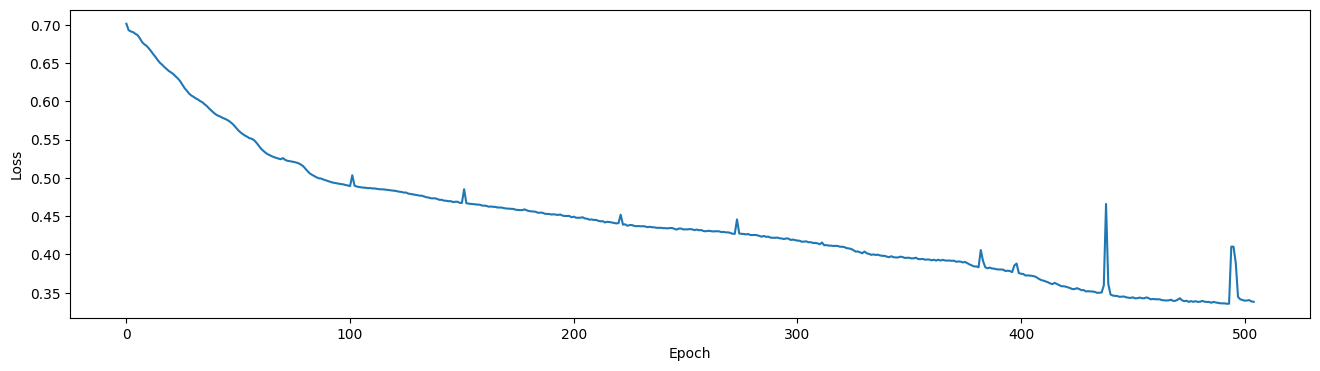

In [8]:
plt.figure(figsize=(16, 4))

plt.plot(mlp.loss_curve_)

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

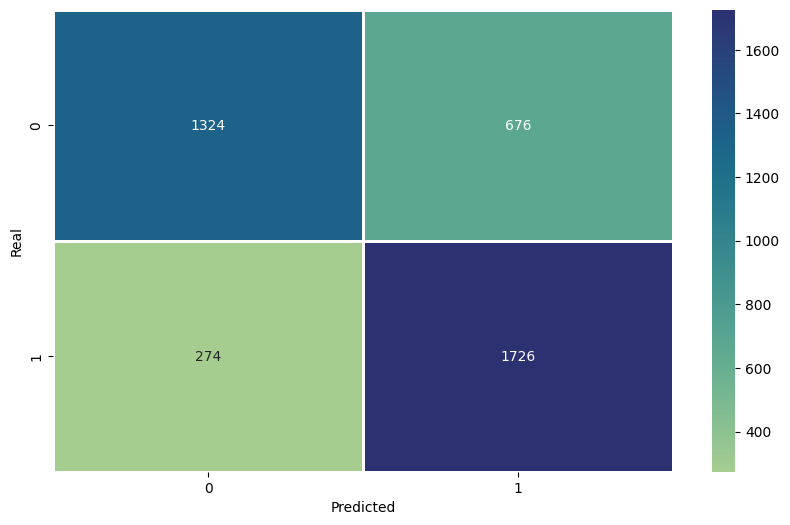


Proportion:
True 1:  71.86%
True 0:  82.85%


In [9]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, linewidth=.8, cmap="crest", fmt='g')

plt.ylabel("Real")
plt.xlabel("Predicted")
plt.show()

print("\nProportion:")
print(f"True 1: {cm[1][1] / (cm[1][1] + cm[0][1]) * 100 : .2f}%")
print(f"True 0: {cm[0][0] / (cm[0][0] + cm[1][0]) * 100 : .2f}%")

## 9.3

Considere o problema de classificação de padrões bidimensionais constituído neste
caso de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na
origem interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada
eixo são centros de quatro semicírculos que se interceptam no interior do quadrado origi-
nando uma classe e as outras quatro classes nas regiões de não interseção. Após gerar alea-
toriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando o conjunto de validação e calculando a matriz de confusão.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


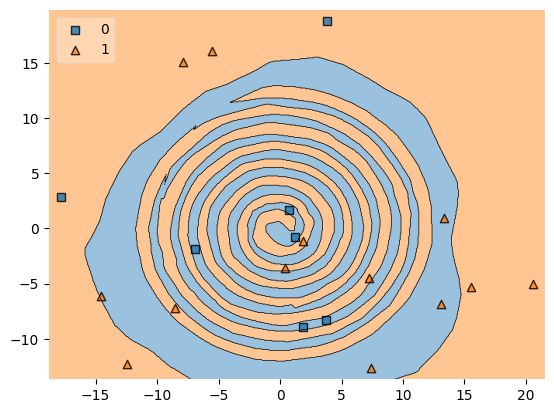

In [10]:
plot_decision_regions(X_test.values[:20], y_test.values[:20], clf=mlp, legend=2)

plt.show()

## 9.3

Considere o problema de classificação de padrões bidimensionais constituído neste
caso de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na
origem interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada
eixo são centros de quatro semicírculos que se interceptam no interior do quadrado origi-
nando uma classe e as outras quatro classes nas regiões de não interseção. Após gerar alea-
toriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando o conjunto de validação e calculando a matriz de confusão.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Perceptron

# Gerar dados
# np.random.seed(0) se quiser repetir sempre os mesmos valores

num_samples_per_class = 1000
num_classes = 5

X = []
y = []

for i in range(num_classes):
    radius = np.random.uniform(0, 1)
    theta = np.random.uniform(i*np.pi/2, (i+1)*np.pi/2, num_samples_per_class)
    x = radius * np.cos(theta)
    y_ = radius * np.sin(theta)
    X.extend(list(zip(x, y_)))
    y.extend([i] * num_samples_per_class)

X = np.array(X)
y = np.array(y)

# Dividir os dados em conjunto de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Fazer previsões no conjunto de validação
y_pred = perceptron.predict(X_val)


In [28]:
# Calcular métricas de avaliação
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print("\nMétricas de Avaliação:")
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Pontuação F1: {f1:.2f}")



Métricas de Avaliação:
Acurácia: 0.85
Precisão: 0.91
Recall: 0.85
Pontuação F1: 0.86


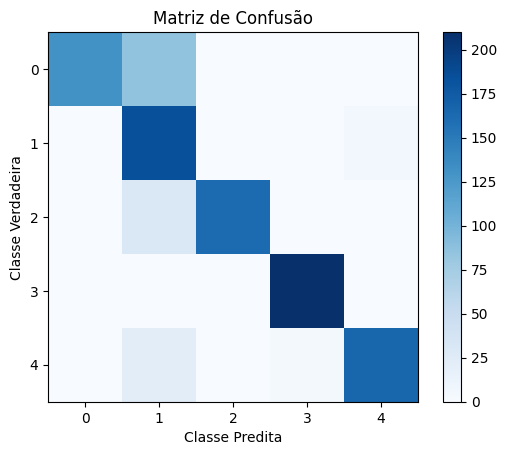

Matriz de Confusão:
[[131  85   0   0   0]
 [  0 184   0   0   6]
 [  0  30 162   0   0]
 [  0   0   0 210   0]
 [  0  22   0   4 166]]


In [29]:
# Calcular matriz de confusão
conf_matrix = confusion_matrix(y_val, y_pred)


# Plotar matriz de confusão
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, range(num_classes))
plt.yticks(tick_marks, range(num_classes))
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.show()

print("Matriz de Confusão:")
print(conf_matrix)